### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as TTS
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC

### Reading Iris Dataset

In [2]:
df = pd.read_csv('iris.csv')
df

,Unnamed: 0,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


### Deleting unnecessary column

In [4]:
del df['Unnamed: 0']

### Ploting a pairplot on Iris Dataset

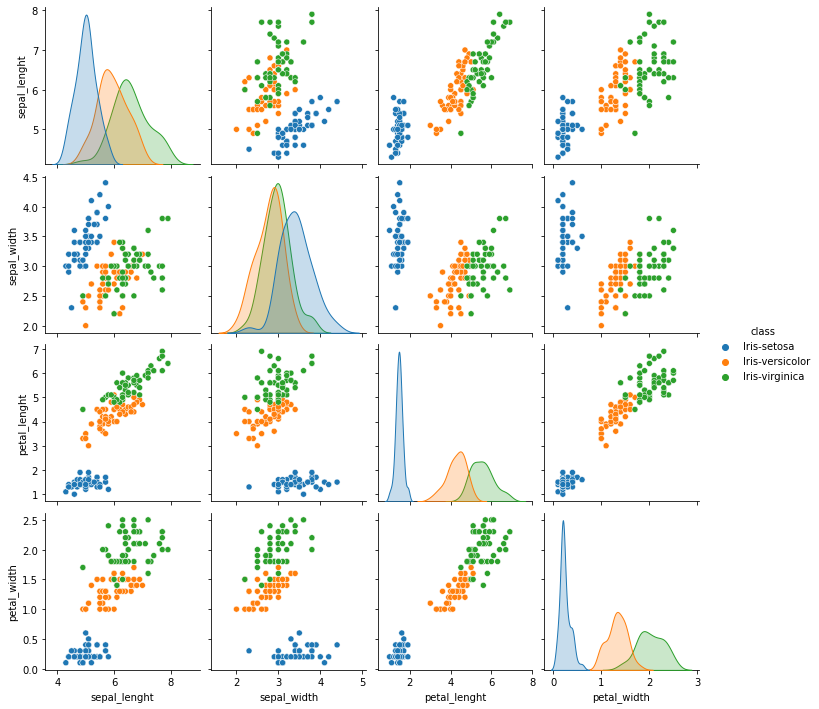

In [5]:
sns.pairplot(df,hue = 'class')

### Ploting a count plot on Iris Dataset

<AxesSubplot:xlabel='class', ylabel='count'>

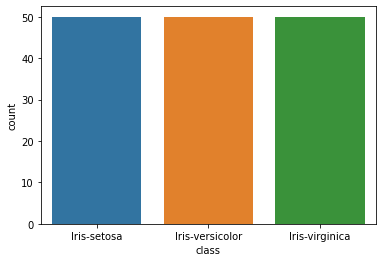

In [6]:
sns.countplot(data=df,x = 'class')

### Assigning features and labels in variables x and y

In [7]:
x = df.drop('class',axis=1)
y = df['class']

### Using train_test_split() function to divide training and testing data

In [8]:
x_train,x_test,y_train,y_test = TTS(x,y)

### Training and Testing K-Neighbors classifier model on different distance formulas

In [22]:
%%time
score = []
l1 = ['euclidean','manhattan','minkowski']
for i in l1:
    scores = []
    for j in range(3,40):
        knnn = KNN(n_neighbors = j, metric = i).fit(x_train,y_train)
        scores.append(knnn.score(x_test,y_test))
    score.append(scores)

Wall time: 383 ms


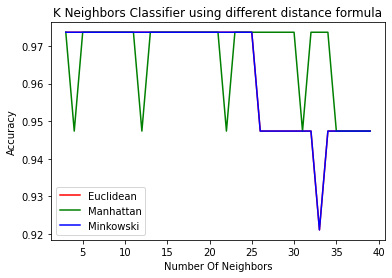

In [21]:
X = np.arange(3,40)
plt.plot(X,score[0],color = 'r', label = 'Euclidean')
plt.plot(X,score[1],color = 'g', label = 'Manhattan')
plt.plot(X,score[2],color = 'b', label = 'Minkowski')
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("K Neighbors Classifier using different distance formula")
plt.legend()
plt.show()

In [20]:
%%time
knn = KNN(n_neighbors = 5, metric = 'minkowski')
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train), knn.score(x_test,y_test))

0.9642857142857143 0.9736842105263158
Wall time: 17.2 ms


### Training and Testing using support vector machine model.

In [12]:
%%time
svm = SVC()
svm.fit(x_train,y_train)
print(svm.score(x_train,y_train), svm.score(x_test,y_test))

0.9732142857142857 0.9736842105263158
Wall time: 8 ms


### Training and Testing using Gaussian Naive Bayes model.

In [13]:
%%time
nb = GNB()
nb.fit(x_train,y_train)
print(nb.score(x_train,y_train), nb.score(x_test,y_test))

0.9553571428571429 0.9736842105263158
Wall time: 8.01 ms


### Training and Testing using Decision Tree Classifier model

In [14]:
%%time
tr = DTC()
tr.fit(x_train,y_train)
print(tr.score(x_train,y_train), tr.score(x_test,y_test))

1.0 0.9736842105263158
Wall time: 8.13 ms


### Training and Testing using Random Forest Classifier model

In [15]:
%%time
rfc = RFC()
rfc.fit(x_train,y_train)
print(rfc.score(x_train,y_train), rfc.score(x_test,y_test))

1.0 0.9736842105263158
Wall time: 126 ms



### 🔸We have used 5 machine learning models:
### 1. K-Neighbors Classifier
### 2. Support Vector Machine
### 3. Gaussian Naive Bayes
### 4. Decision Tree Classifier
### 5. Random Forest Classifier

### 🔸We can see that 'Decision Tree Classifier' and 'Random Forest Classifier' models overfits the training data.
### 🔸Among the 'K-Neighbors Classifier', 'Support Vector Machine' and 'Gaussian Naive Bayes' models, Support Vector Classifier performs best on both training as well as testing data.

### 🔸Hence, 'Support Vector Machine' model acts as the best machine learning model for this dataset.